download shape predictor from here

https://drive.google.com/file/d/1JY3rauhg4z7BqiJFlzJz225-Xahshyrz/view?usp=sharing

In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

## **Facial Landmark Detection**

In [ ]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
# Extract the face from the image

predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()

In [ ]:
class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass


def get_landmarks(image):
    rects = detector(image, 1)

    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces

    return np.matrix([[p.x, p.y] for p in predictor(image, rects[0]).parts()])

In [ ]:
# landmarks on the Face
def annotate_landmarks(image, landmarks):
  image = image.copy()
  for idx, point in enumerate(landmarks):
    pos = (point[0, 0], point[0, 1])
    cv2.putText(image, str(idx), pos,fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale = 0.4,color=(0,0,255))
    cv2.circle(image,pos,3,color=(0,255,))

  return image


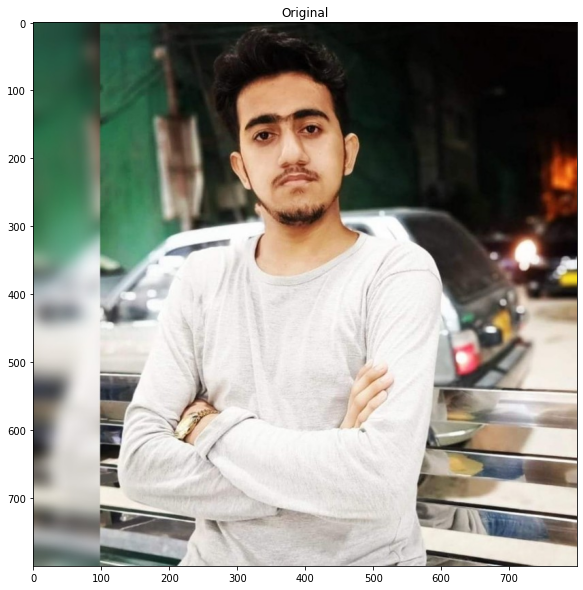

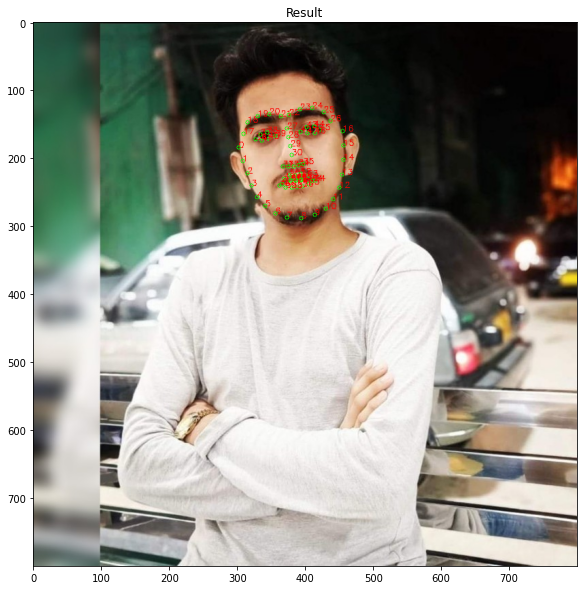

In [ ]:
# use your image here
image = cv2.imread('/content/pic.jfif')
imshow('Original', image)
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
imshow('Result', image_with_landmarks)

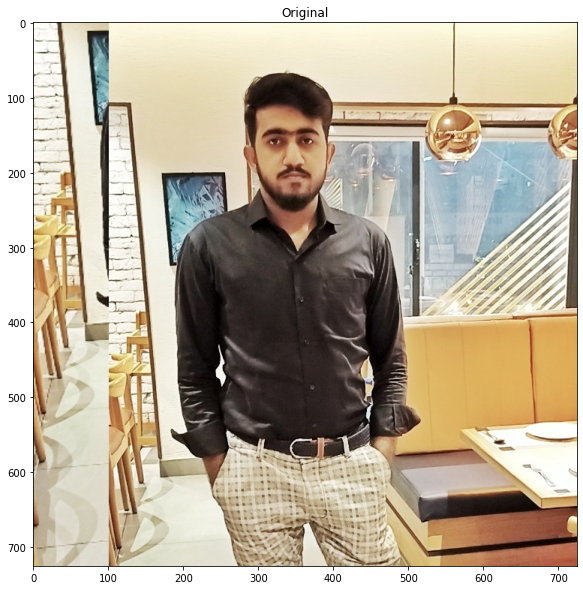

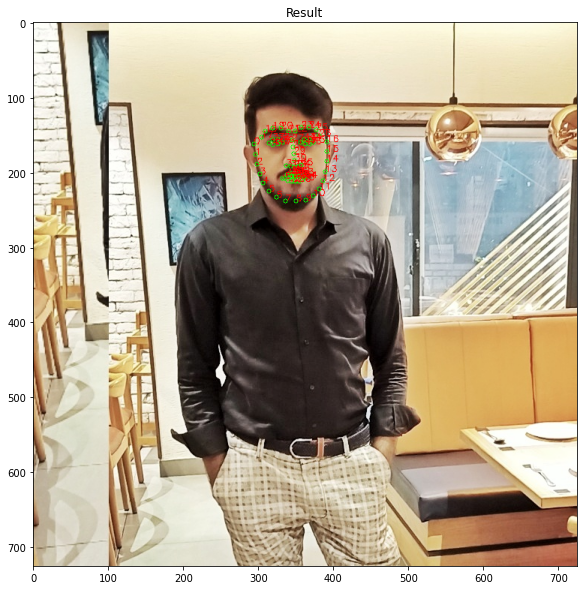

In [ ]:
# again Use your image here
image = cv2.imread('/content/My Pic.jpeg')
imshow('Original', image)
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
imshow('Result', image_with_landmarks)